In [37]:
%load_ext autoreload
%autoreload 2

# Load packages
import numpy as np
import sde_solvers as sde
from scipy import stats
import matplotlib.pyplot as plt
import imports.stochastic_plots as stoch
import imports.arrival_process_simulation as arrival

_ = plt.rcParams['figure.figsize'] = (10, 6)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Euler integration scheme for ODE's

In [38]:
def ode_euler(t0, x0, T, a, N):

    dT = T / N # size of simulation step
    
    # Initialize solution array
    t = np.linspace(t0, t0+T, N+1) # integration grid
    X = np.zeros(N+1)
    
    # Initial condition
    X[0] = x0
 
    # Integration of the ODE
    for n in range(N):
        X[n+1] = X[n] + a(t[n], X[n])*dT
        
    return (t, X)

# Integration schemes for SDE's

In [39]:
# Define SDE
mu = 1.3
sigma = 0.4
def a(t,x): return mu*x
def b(t,x): return sigma*x
def db_dx(t,x): return sigma

# Define initial conditions
t0, x0 = 0.0, 100.0
# Define the simulation parameters 
M = 10000 # Number of trajectories for simulation
T = 2.0   # Length of simulation interval
N = 1000  # Number of steps in simulation

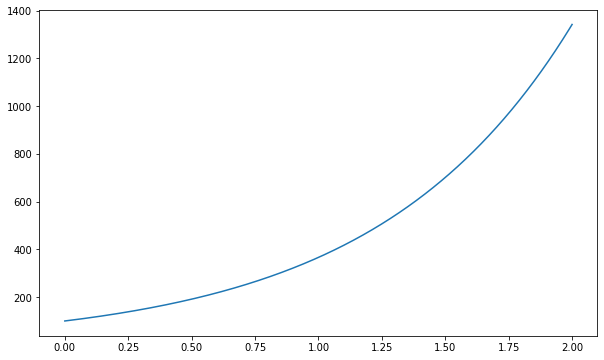

In [40]:
t, X_mean = ode_euler(t0, x0, T, a, N)
_ = plt.plot(t, X_mean)

## Stochastic Euler integration (Euler- Maruyana) scheme

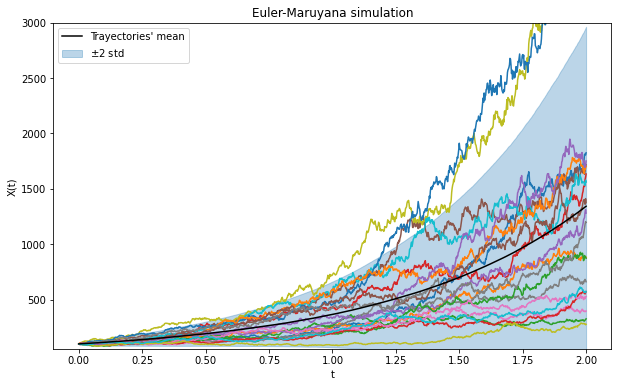

In [57]:
# Carry out simulation
t, X_euler = sde.euler_maruyana(t0, x0, T, a, b, M, N)
y_max = min(np.max(X_euler), 3000)
 
# Plot trajectories 
stoch.plot_trajectories(t, X_euler, fig_num=1)

sde.subplot_mean_and_std(t, np.mean(X_euler, axis=0),
                         2*np.std(X_euler, axis=0),
                         ylims=[np.min(X_euler), y_max],
                         color='black')
plt.legend(['Trayectories\' mean', '$\pm$2 std'])
_ = plt.title('Euler-Maruyana simulation')

## Milstein integration sheme

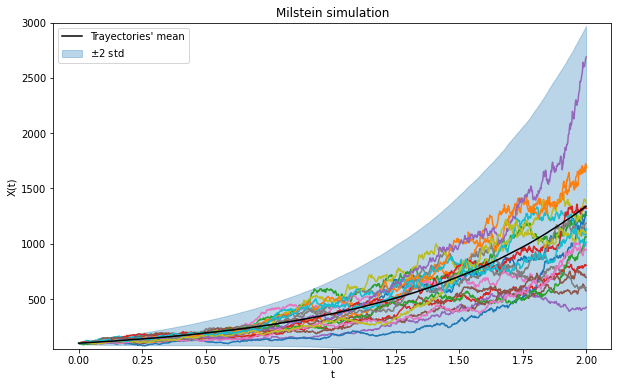

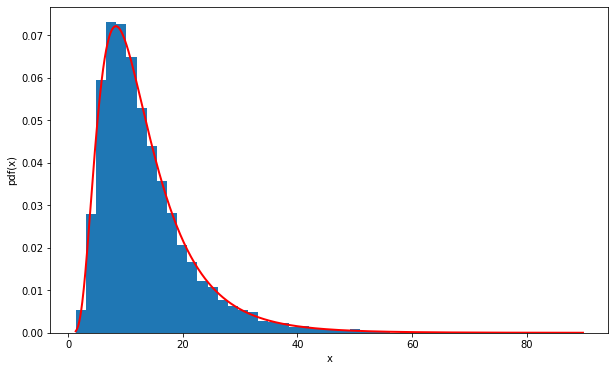

In [60]:
t, X_milstein = sde.milstein(t0, x0, T, a, b, db_dx, M, N)
y_max = min(np.max(X_milstein), 3000)
            
# Plot trajectories 
stoch.plot_trajectories(t, X_milstein, fig_num=1)
sde.subplot_mean_and_std(t, np.mean(X_milstein, axis=0),
                         2*np.std(X_milstein, axis=0),
                         ylims=[np.min(X_milstein), y_max], color='black')
plt.legend(['Trayectories\' mean', '$\pm$2 std'])
plt.title('Milstein simulation')

# Plot histogram 
xT = X_milstein[:,-1]
def pdf(x): return stats.lognorm.pdf(x, 
                           sigma*np.sqrt(T), 0.0, np.exp((mu - 0.5*sigma**2)*T))
stoch.plot_pdf(xT/x0, pdf, fig_num=2)

## Jump simulator

[array([   2.88542058,    3.45809117,    3.81419128,    6.11890731,
          8.28320722,    8.60023788,   10.19468285,   10.59224852,
         13.13424119,   16.79428558,   26.7294864 ,   29.6566408 ,
         31.98193028,   32.9142445 ,   35.70647035,   36.13106998,
         39.06094646,   39.10392138,   39.22481791,   39.27614696,
         42.30333589,   42.80544516,   42.91344666,   44.89451894,
         45.10430116,   46.03129934,   46.2104486 ,   50.19605013,
         52.18094848,   52.86968039,   53.68451491,   54.27924669,
         54.35078418,   54.89612692,   57.41225962,   58.58492576,
         62.6569666 ,   63.12529507,   63.66337151,   63.87093354,
         66.37809005,   71.17192583,   71.41717591,   75.18230356,
         75.19168022,   75.57858987,   78.06858381,   78.17162752,
         80.90783077,   82.83967105,   83.71255156,   85.45285014,
         95.31349127,  100.0521312 ,  102.72373682,  103.62674073,
        105.74266164,  109.04966718,  109.67962817,  116.1496

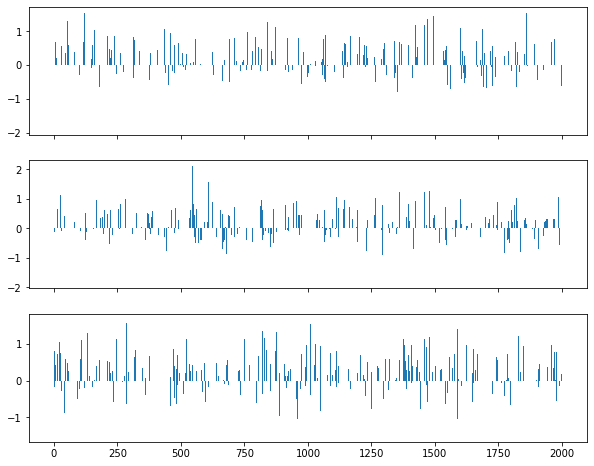

In [61]:
lambda_rate = 0.5
beta_scale = 1.0/lambda_rate 
def simulator_arrival_times(t0, T): 
    return  arrival.simulate_poisson(t0, t0 + T, lambda_rate, M = 1)[0]
def simulator_jump_sizes(N): return 0.2 + 0.5*np.random.randn(N)

def simulator_jump_process(t0, T, M): 
    return sde.simulate_jump_process(t0, T,
                                     simulator_arrival_times, 
                                     simulator_jump_sizes, 
                                     M)

t0 = 0.0
T = 2000.0
M = 3
times_of_jumps, sizes_of_jumps = simulator_jump_process(t0, T, M)

fig, axs = plt.subplots(M, sharex=True, num=1, figsize=(10, 8))
for m in range(M):
     axs[m].bar(times_of_jumps[m], sizes_of_jumps[m])
        
print(times_of_jumps)

## Jump-diffusion SDE

In [25]:
## Define jump-diffusion SDE
def a(t,x): return 5.0*x/x0
def b(t,x): return 3.0*x/x0
def c(t,x): return 10.0*x/x0

## Define the conditions for the simulation

t0 = 0
x0 = 10.0
T = 2.0
N = 1000
M = 500


t, X = sde.euler_jump_diffusion(t0, x0, T, a, b, c, 
                         simulator_jump_process, 
                         M, N)

stoch.plot_trajectories(t, X, fig_num=10)


SystemExit: euler_jump_diffusion not implemented

c:\users\jose\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
